In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
meta_df = pd.read_csv("jan_train.csv")
meta_df.head()

,id,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
0,0,2014-01-01 00:00:00.000,0,-8855.823863,13117.780146,-20728.353233,-0.908303,-3.808436,-2.022083,-8843.131454,13138.221690,-20741.615306,-0.907527,-3.804930,-2.024133
1,1,2014-01-01 00:46:43.000,0,-10567.672384,1619.746066,-24451.813271,-0.302590,-4.272617,-0.612796,-10555.500066,1649.289367,-24473.089556,-0.303704,-4.269816,-0.616468
2,2,2014-01-01 01:33:26.001,0,-10578.684043,-10180.467460,-24238.280949,0.277435,-4.047522,0.723155,-10571.858472,-10145.939908,-24271.169776,0.274880,-4.046788,0.718768
3,3,2014-01-01 02:20:09.001,0,-9148.251857,-20651.437460,-20720.381279,0.715600,-3.373762,1.722115,-9149.620794,-20618.200201,-20765.019094,0.712437,-3.375202,1.718306
4,4,2014-01-01 03:06:52.002,0,-6719.092336,-28929.061629,-14938.907967,0.992507,-2.519732,2.344703,-6729.358857,-28902.271436,-14992.399986,0.989382,-2.522618,2.342237


In [3]:
len(meta_df.columns)

15

In [4]:
meta_df.shape

(503227, 15)

In [5]:
meta_df['sat_id'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [6]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503227 entries, 0 to 503226
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      503227 non-null  int64  
 1   epoch   503227 non-null  object 
 2   sat_id  503227 non-null  int64  
 3   x       503227 non-null  float64
 4   y       503227 non-null  float64
 5   z       503227 non-null  float64
 6   Vx      503227 non-null  float64
 7   Vy      503227 non-null  float64
 8   Vz      503227 non-null  float64
 9   x_sim   503227 non-null  float64
 10  y_sim   503227 non-null  float64
 11  z_sim   503227 non-null  float64
 12  Vx_sim  503227 non-null  float64
 13  Vy_sim  503227 non-null  float64
 14  Vz_sim  503227 non-null  float64
dtypes: float64(12), int64(2), object(1)
memory usage: 57.6+ MB


# Analysis for SAT-0

In [7]:
filt = (meta_df["sat_id"]==0)

In [8]:
filt

0          True
1          True
2          True
3          True
4          True
          ...  
503222    False
503223    False
503224    False
503225    False
503226    False
Name: sat_id, Length: 503227, dtype: bool

In [9]:
sat0_df = meta_df.loc[filt]

In [10]:
sat0_df.head()

,id,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
0,0,2014-01-01 00:00:00.000,0,-8855.823863,13117.780146,-20728.353233,-0.908303,-3.808436,-2.022083,-8843.131454,13138.221690,-20741.615306,-0.907527,-3.804930,-2.024133
1,1,2014-01-01 00:46:43.000,0,-10567.672384,1619.746066,-24451.813271,-0.302590,-4.272617,-0.612796,-10555.500066,1649.289367,-24473.089556,-0.303704,-4.269816,-0.616468
2,2,2014-01-01 01:33:26.001,0,-10578.684043,-10180.467460,-24238.280949,0.277435,-4.047522,0.723155,-10571.858472,-10145.939908,-24271.169776,0.274880,-4.046788,0.718768
3,3,2014-01-01 02:20:09.001,0,-9148.251857,-20651.437460,-20720.381279,0.715600,-3.373762,1.722115,-9149.620794,-20618.200201,-20765.019094,0.712437,-3.375202,1.718306
4,4,2014-01-01 03:06:52.002,0,-6719.092336,-28929.061629,-14938.907967,0.992507,-2.519732,2.344703,-6729.358857,-28902.271436,-14992.399986,0.989382,-2.522618,2.342237


In [11]:
sat0_df.tail()

,id,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
736,736,2014-01-24 20:16:45.366,0,17323.752275,-2929.599994,40015.054282,-0.066983,2.651528,-0.240019,16677.210531,5234.016160,38340.904456,-0.330504,2.634282,-0.848806
737,737,2014-01-24 21:03:28.366,0,16803.492692,4510.550397,38575.720092,-0.306878,2.639582,-0.792502,15395.263519,12449.405030,35146.024515,-0.586354,2.491844,-1.435062
738,738,2014-01-24 21:50:11.367,0,15589.464016,11758.599852,35543.718040,-0.561601,2.510341,-1.375365,13380.486475,19062.449796,30278.225301,-0.852275,2.198419,-2.039662
739,739,2014-01-24 22:36:54.367,0,13644.957424,18446.405418,30846.351215,-0.827062,2.233959,-1.978216,10617.516680,24593.429195,23717.669835,-1.117669,1.711798,-2.636755
740,740,2014-01-24 23:23:37.368,0,10951.688066,24106.659914,24456.597220,-1.093516,1.769369,-2.577266,7135.816766,28430.515190,15552.366754,-1.359856,0.981096,-3.172296


In [12]:
sat0_df.loc[sat0_df["sat_id"]==1]

,id,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim


In [13]:
sat0_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 0 to 740
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      741 non-null    int64  
 1   epoch   741 non-null    object 
 2   sat_id  741 non-null    int64  
 3   x       741 non-null    float64
 4   y       741 non-null    float64
 5   z       741 non-null    float64
 6   Vx      741 non-null    float64
 7   Vy      741 non-null    float64
 8   Vz      741 non-null    float64
 9   x_sim   741 non-null    float64
 10  y_sim   741 non-null    float64
 11  z_sim   741 non-null    float64
 12  Vx_sim  741 non-null    float64
 13  Vy_sim  741 non-null    float64
 14  Vz_sim  741 non-null    float64
dtypes: float64(12), int64(2), object(1)
memory usage: 92.6+ KB


In [14]:
sat0_df_univ = sat0_df[["epoch", "x"]]

In [15]:
sat0_df_univ.head(10)

,epoch,x
0,2014-01-01 00:00:00.000,-8855.823863
1,2014-01-01 00:46:43.000,-10567.672384
2,2014-01-01 01:33:26.001,-10578.684043
3,2014-01-01 02:20:09.001,-9148.251857
4,2014-01-01 03:06:52.002,-6719.092336
5,2014-01-01 03:53:35.002,-3708.453525
6,2014-01-01 04:40:18.003,-437.699227
7,2014-01-01 05:27:01.003,2863.147037
8,2014-01-01 06:13:44.004,6031.593902
9,2014-01-01 07:00:27.004,8950.655291


In [16]:
sat0_df_univ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 0 to 740
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   epoch   741 non-null    object 
 1   x       741 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.4+ KB


In [17]:
sat0_df_univ["epoch"] = pd.to_datetime(sat0_df_univ["epoch"])

C:\Users\adity\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
sat0_df_univ.head()

,epoch,x
0,2014-01-01 00:00:00.000,-8855.823863
1,2014-01-01 00:46:43.000,-10567.672384
2,2014-01-01 01:33:26.001,-10578.684043
3,2014-01-01 02:20:09.001,-9148.251857
4,2014-01-01 03:06:52.002,-6719.092336


In [19]:
sat0_df_univ.tail()

,epoch,x
736,2014-01-24 20:16:45.366,17323.752275
737,2014-01-24 21:03:28.366,16803.492692
738,2014-01-24 21:50:11.367,15589.464016
739,2014-01-24 22:36:54.367,13644.957424
740,2014-01-24 23:23:37.368,10951.688066


In [20]:
sat0_df_univ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 0 to 740
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   epoch   741 non-null    datetime64[ns]
 1   x       741 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.4 KB


In [21]:
sat0_df_univ['epoch'].max() - sat0_df_univ['epoch'].min()

Timedelta('23 days 23:23:37.368000')

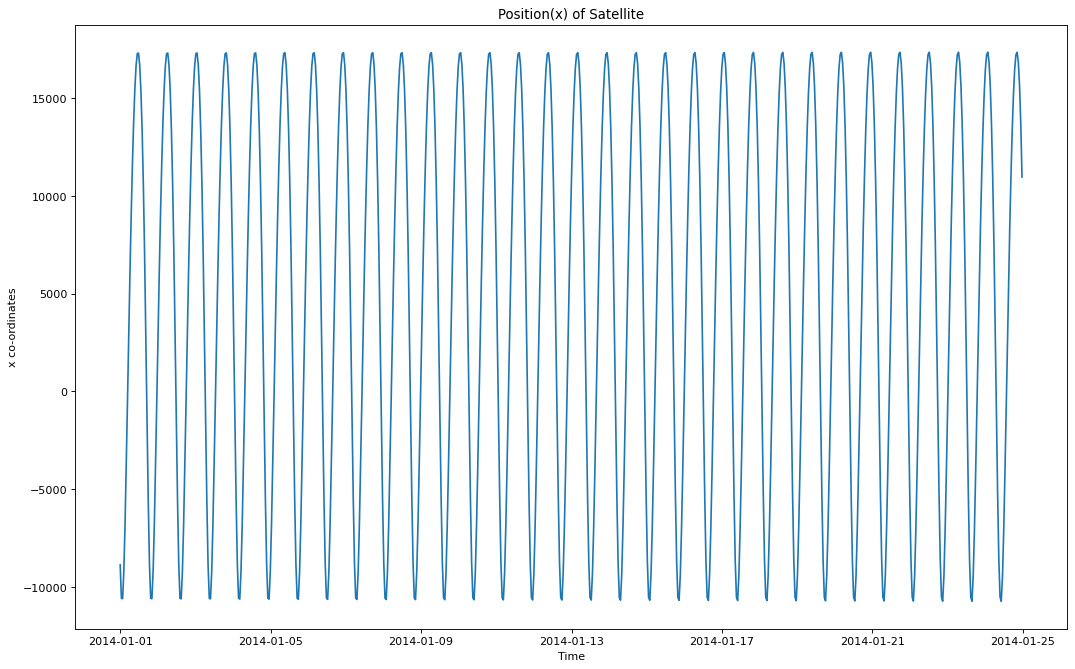

In [22]:
from matplotlib.pyplot import figure
figure(figsize=(16, 10), dpi=80)

plt.plot(sat0_df_univ["epoch"], sat0_df_univ["x"])
plt.xlabel("Time")
plt.ylabel("x co-ordinates")
plt.title("Position(x) of Satellite")
plt.show()

In [23]:
x_pos = sat0_df_univ["x"]
x_pos.describe()

count      741.000000
mean      4912.520136
std       9851.147157
min     -10716.106467
25%      -5156.221079
50%       7005.209383
75%      15173.743957
max      17325.111650
Name: x, dtype: float64

In [24]:
data = x_pos

In [25]:
data.shape

(741,)

In [26]:
type(data)

pandas.core.series.Series

# Examine stationarity of data

In [27]:
# Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(data)

In [28]:
print(pvalue)

0.002473777001334866


# Autocorrelation

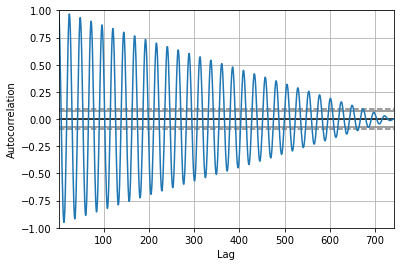

In [29]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data) 

In [30]:
data.shape

(741,)

In [31]:
data.dtype

dtype('float64')

In [32]:
type(data)

pandas.core.series.Series

# Forecasting using ARIMA

In [33]:
!pip install pmdarima

In [34]:
from pmdarima.arima import auto_arima

In [35]:
#Autoarima gives us best model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components

In [36]:
type(data)

pandas.core.series.Series

In [37]:
arima_model = auto_arima(data, start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)          

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=1.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=14492.621, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.84 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=1.59 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=9338.871, Time=2.62 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=9340.651, Time=4.06 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=9340.634, Time=5.87 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=6.03 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=inf, Time=3.01 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=7.12 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=8722.161, Time=5.91 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=2.91 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=58.76 sec
 

In [38]:
# To print the summary 
print(arima_model.summary() ) #Note down the Model and details.


                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  741
Model:             SARIMAX(5, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood                   0.000
Date:                                 Mon, 10 Jan 2022   AIC                             18.000
Time:                                         18:33:23   BIC                             59.313
Sample:                                              0   HQIC                            33.941
                                                 - 741                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.7908         -0       -inf      0.000       2.791       2

C:\Users\adity\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2968: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
C:\Users\adity\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\stattools.py:1339: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
C:\Users\adity\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\stattools.py:677: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


In [39]:
train_len = 521
test_len = 220

In [40]:
data_np = np.array(data)

In [41]:
X_train = data_np[:train_len]
X_test = data_np[train_len:] 

In [42]:
print(len(X_train), len(X_test))
print(X_train.shape, X_test.shape)

521 220
(521,) (220,)


In [43]:
# Fit a SARIMAX(5, 1, 0)x(1, 1, [1, 2], 12)  on the training set 

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [45]:
model = SARIMAX(X_train,  
                order = (5, 1, 0),
                seasonal_order = (1, 1, [1, 2], 12) 
                )
  

In [46]:
result = model.fit() 

C:\Users\adity\anaconda3\envs\tf\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [47]:
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  521
Model:             SARIMAX(5, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood               -3066.665
Date:                                 Mon, 10 Jan 2022   AIC                           6151.329
Time:                                         18:35:12   BIC                           6189.404
Sample:                                              0   HQIC                          6166.260
                                                 - 521                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2206      0.009    133.005      0.000       1.203       1.239
ar.L2         -0.3145      0.027    -11.509      0.000      -0.368      -0.261
ar.L3         -0.0823      0.068     -1.203      0.229      -0.216       0.052
ar.L4          0.0190      0.101      0.189      0.850      -0.178       0.216
ar.L5         -0.0725      0.057     -1.263      0.207      -0.185       0.040
ar.S.L12      -0.9969      0.001   -770.602      0.000      -0.999      -0.994
ma.S.L12      -0.0731      0.054     -1.364      0.173      -0.178       0.032
ma.S.L24      -0.5515      0.016    -35.293      0.000      -0.582      -0.521
sigma2      8458.2175     75.205    112.468      0.000    8310.818    8605.617
===================================================================================
Ljung-Box (L1) (Q):                   1.60   Jarque-Bera (JB):            176460.84
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               0.11   Skew:                            -4.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        93.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
#Train prediction
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index, end_index) 

In [49]:
#Prediction
start_index = len(X_train)
end_index = len(data)-1
prediction = result.predict(start_index, end_index)

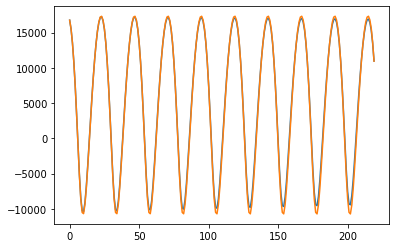

In [50]:
plt.plot(prediction)
plt.plot(X_test)

In [51]:
import math
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(X_train, train_prediction))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(X_test, prediction))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 513.90 RMSE
Test Score: 480.68 RMSE


C:\Users\adity\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'Left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


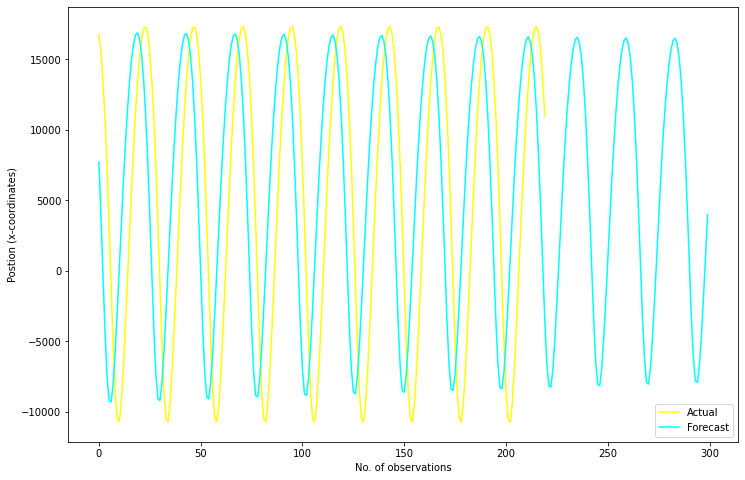

In [55]:
forecast = result.predict(start = len(data),  
                          end = (len(data)-1) + 300,  
                          typ = 'levels') 
  
plt.figure(figsize=(12,8))
#plt.plot(X_train, label='Training', color='green')

plt.plot(X_test, label='Actual', color='yellow')
plt.plot(forecast, label='Forecast', color='cyan')
plt.xlabel("No. of observations")
plt.ylabel("Postion (x-coordinates)")
plt.legend(loc='Left corner')
plt.show()